In [54]:
import pandas as pd
from rdkit import Chem
from tqdm.auto import tqdm
from rdkit.Chem.Draw import MolsToGridImage
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
import matplotlib.pyplot as plt

In [55]:
trainData = pd.read_csv("allTrainDescriptors.csv")
trainTarget = pd.read_csv("trainTarget.csv")

In [56]:
testData = pd.read_csv("lipTestDescriptors.csv")
testData = testData.loc[:, ['MolWt', 'MolLogP', 'NumRotatableBonds', 'NumHAcceptors', 'NumHDonors']]
testTarget = pd.read_csv("lipTestTarget.csv")

In [57]:
from sklearn.impute import SimpleImputer
import numpy as np

origData = pd.read_csv("allDescriptors.csv")

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
allData = imp_mean.fit_transform(origData)
allData = pd.DataFrame(data = allData, columns = origData.columns)

allTargets = pd.read_csv("allTargets.csv")

In [58]:
from sklearn.preprocessing import StandardScaler

allDataVals = StandardScaler().fit_transform(allData.values)
allTargetVals = allTargets.values

In [59]:
from sklearn.decomposition import PCA

pca = PCA()
PCs = pd.DataFrame(data = pca.fit_transform(allDataVals))
principalDf = pd.concat([PCs.iloc[:,0], PCs.iloc[:,1]], axis = 1)
principalDf.columns = ['principal component 1', 'principal component 2']
finalDf = pd.concat([principalDf, allTargets], axis = 1)

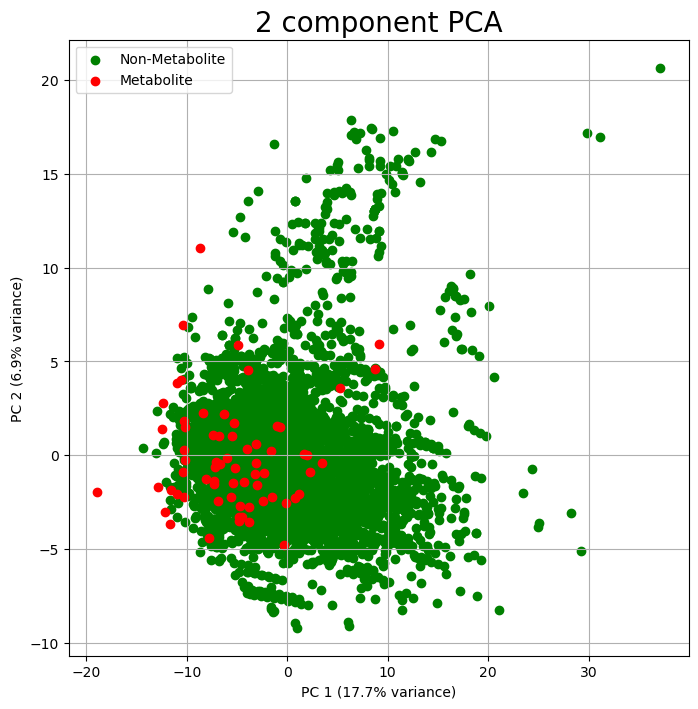

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('2 component PCA', fontsize = 20)
for i in range(0, len(trainData)):
    if i == 0:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'g', label = "Non-Metabolite")
    else:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'g')
for i in range(len(trainData) - 1, len(allData)):
    if i == len(trainData) - 1:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'r', label = "Metabolite")
    else:
        ax.scatter(finalDf['principal component 1'].values[i], finalDf['principal component 2'].values[i], c = 'r')
plt.legend()

ax.set_xlabel('PC 1 ({:.1f}% variance)'.format(
    pca.explained_variance_ratio_[0]*100))
ax.set_ylabel(ylabel = 'PC 2 ({:.1f}% variance)'.format(
    pca.explained_variance_ratio_[1]*100))

ax.grid()

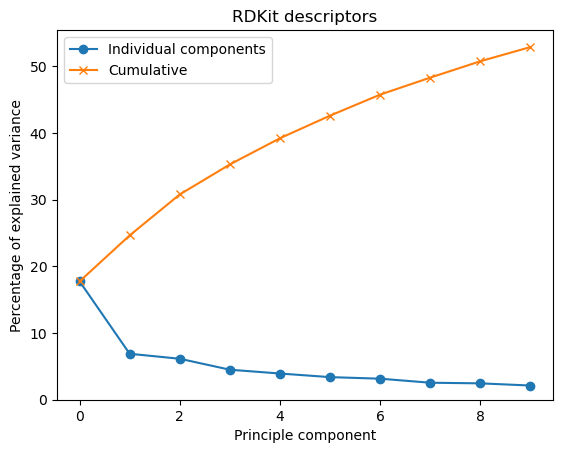

In [61]:
# Number of components to plot:
n_components = 10

# Plot percentage of explained variance per component:
plt.plot(range(n_components), 
           pca.explained_variance_ratio_[:n_components]*100, 
           label='Individual components', 
           marker='o')

# Plot cumulative percentage of explained variance:
plt.plot(range(n_components), 
           np.cumsum(pca.explained_variance_ratio_[:n_components])*100, 
           marker='x', 
           label='Cumulative', 
           color='tab:orange')

plt.ylim(bottom=0)

plt.xlabel('Principle component')
plt.ylabel('Percentage of explained variance')

plt.legend()

plt.title('RDKit descriptors')

plt.savefig('PCA_explained_variance.png', dpi=600)
plt.show()